In [48]:
from subprocess import Popen
import numpy as np

n_objects = np.arange(2, 10, 2)

for i in range(len(n_objects)): 
    
    Popen(['python', 'plan_batch.py', str(n_objects[i])], cwd='/Users/bmmorris/git/saint-stare/')

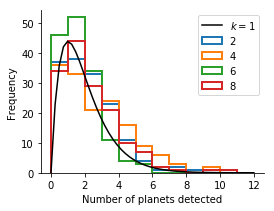

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
plt.figure(figsize=(4, 3))
for i, n_targets in enumerate(np.arange(2, 10, 2)): 
    paths = glob('data/sim_obs/batch2/{0}_*'.format(n_targets))
    
    ntransits = []
    for path in paths: 
        ntransits.extend(np.load(path))
        
    n = plt.hist(ntransits, bins=12, histtype='step', lw=2, color='C{0}'.format(i),
                 range=[0, 12], label=n_targets)[0]
#     plt.axvline(np.mean(ntransits), color='C{0}'.format(i), lw=2)
    
lam = np.linspace(0, 12)

pattern = [None, '-', ':']
for k in range(1, 2):
    poisson = np.exp(-lam)*lam**k / np.math.factorial(k)
    plt.plot(lam, poisson * n.max()/poisson.max(), 'k', ls=pattern[k], label='$k = {0}$'.format(k))
plt.xlabel('Number of planets detected')
plt.ylabel('Frequency')
plt.legend()

for s in ['right', 'top']: 
    plt.gca().spines[s].set_visible(False)

plt.savefig('plots/planet_counts.pdf', bbox_inches='tight')